In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data=pd.read_csv(r"C:\Users\suman\Downloads\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [3]:
data.shape

(400, 11)

In [4]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


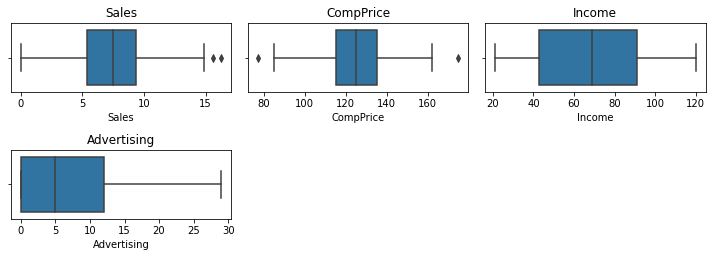

In [7]:
# chacking the outlier
plt.figure(figsize=(10,5))

plt.subplot(3,3,1)
sns.boxplot(x='Sales', data = data)
plt.title('Sales')

plt.subplot(3,3,2)
sns.boxplot(x='CompPrice', data = data)
plt.title('CompPrice')

plt.subplot(3,3,3)
sns.boxplot(x='Income', data = data)
plt.title('Income')

plt.subplot(3,3,4)
sns.boxplot(x='Advertising', data = data)
plt.title('Advertising')

plt.tight_layout()


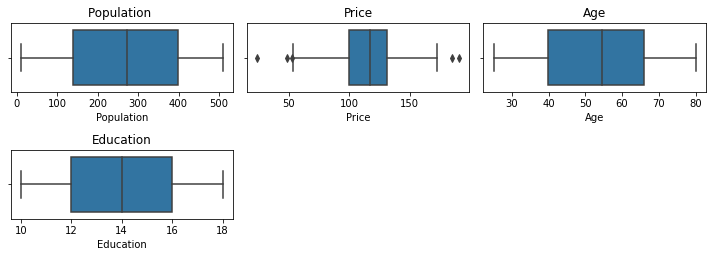

In [8]:
# chacking the outlier
plt.figure(figsize=(10,5))

plt.subplot(3,3,1)
sns.boxplot(x='Population', data = data)
plt.title('Population ')

plt.subplot(3,3,2)
sns.boxplot(x='Price', data = data)
plt.title('Price')

plt.subplot(3,3,3)
sns.boxplot(x='Age', data = data)
plt.title('Age')

plt.subplot(3,3,4)
sns.boxplot(x='Education', data = data)
plt.title('Education')

plt.tight_layout()

In [9]:
#remove the outlier
data.drop(data.index[data['Sales']>14], inplace=True)
data.drop(data.index[data['CompPrice']>165], inplace=True)
data.drop(data.index[data['CompPrice']<80], inplace=True)
data.drop(data.index[data['Price']>175], inplace=True)
data.drop(data.index[data['Price']<60], inplace=True)

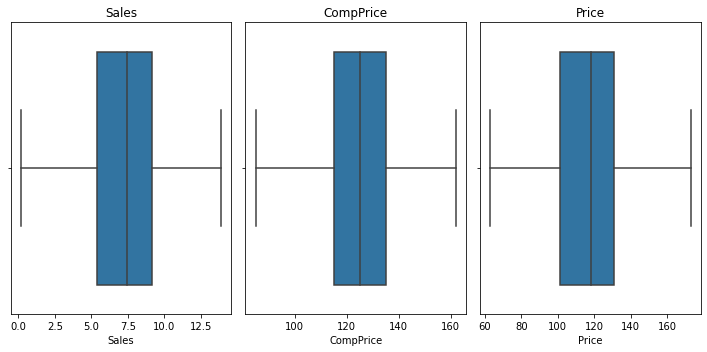

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.boxplot(x='Sales', data = data)
plt.title('Sales')

plt.subplot(1,3,2)
sns.boxplot(x='CompPrice', data = data)
plt.title('CompPrice')

plt.subplot(1,3,3)
sns.boxplot(x='Price', data = data)
plt.title('Price')

plt.tight_layout()

In [11]:
data.shape

(389, 11)

In [12]:
#Adding new column sales_status 
data['sales_status'] = '<7.5'

In [13]:
#Converting the Sales variable to bucketing
data.loc[data['Sales']>=7.5 , 'sales_status'] = 'High'
data.loc[data['Sales']<7.5 , 'sales_status'] = 'Low'
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [14]:
data['sales_status'].value_counts()

Low     199
High    190
Name: sales_status, dtype: int64

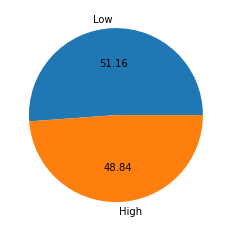

In [15]:
#balance data
plt.pie(data['sales_status'].value_counts(), labels=['Low', 'High'], autopct='%0.2f')
plt.show()

In [16]:
#Droping the Sales variable
data.drop('Sales', axis=1, inplace=True)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [17]:
#Model fit 
# model  not consider String. So, we encode
label_en = LabelEncoder()
for i in range(0, data.shape[1]):
    if data.dtypes[i] == 'object':
        data[data.columns[i]] = label_en.fit_transform(data[data.columns[i]])
        
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [18]:
#Splitting Dataset into features & labels
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [19]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [20]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: sales_status, Length: 389, dtype: int32

In [21]:
#Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=40, stratify=y)

In [22]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
249,125,67,0,86,117,0,65,11,1,0
392,129,42,13,315,130,0,34,13,1,1
377,132,61,0,263,125,2,41,12,0,0
318,116,72,10,456,130,1,41,14,0,1
138,125,103,12,371,109,2,44,10,1,1
...,...,...,...,...,...,...,...,...,...,...
26,107,115,11,496,131,1,50,11,0,1
131,108,69,3,208,94,2,77,16,1,0
363,111,75,1,377,108,1,25,12,1,0
317,142,30,0,472,136,1,80,15,0,0


In [23]:
y_train

249    1
392    1
377    1
318    0
138    0
      ..
26     0
131    1
363    0
317    1
16     0
Name: sales_status, Length: 291, dtype: int32

In [24]:
#Training data 
x_train.shape 

(291, 10)

In [25]:
#Test Data
x_test.shape

(98, 10)

In [26]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
249,125,67,0,86,117,0,65,11,1,0
392,129,42,13,315,130,0,34,13,1,1
377,132,61,0,263,125,2,41,12,0,0
318,116,72,10,456,130,1,41,14,0,1
138,125,103,12,371,109,2,44,10,1,1


In [27]:
x_test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
101,128,93,0,89,118,2,34,18,1,0
247,123,114,0,298,151,0,34,16,1,0
331,135,63,15,213,134,2,32,10,1,1
349,134,27,18,467,96,2,49,14,0,1
117,145,53,0,507,119,2,41,12,1,0


In [28]:
#model
model_1 = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=40)
model_1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=40)

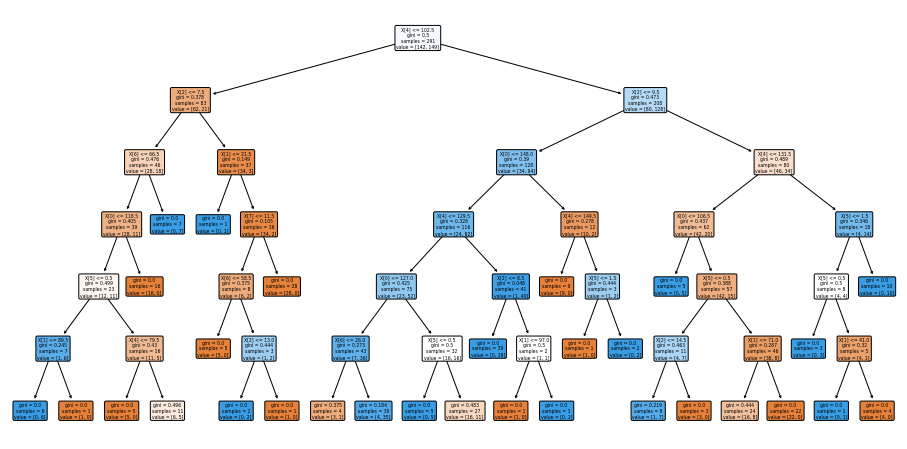

In [29]:
plt.figure(figsize = (16,8))
tree.plot_tree(model_1,rounded=True,filled=True)
plt.show()

In [30]:
#Model Evaluation
y_train_pred = model_1.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy score for trained data: ', round(accuracy, 4))

Accuracy score for trained data:  0.8969


In [31]:
confusion_matrix(y_train, y_train_pred)

array([[137,   5],
       [ 25, 124]], dtype=int64)

In [32]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       142
           1       0.96      0.83      0.89       149

    accuracy                           0.90       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.90      0.90      0.90       291



In [33]:
#Model Prediction using test data
y_test_pred = model_1.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy Score for tested data : ', round(accuracy_test, 4))

Accuracy Score for tested data :  0.6633


In [34]:
confusion_matrix(y_test, y_test_pred)

array([[32, 16],
       [17, 33]], dtype=int64)

In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66        48
           1       0.67      0.66      0.67        50

    accuracy                           0.66        98
   macro avg       0.66      0.66      0.66        98
weighted avg       0.66      0.66      0.66        98



In [36]:
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=40)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)

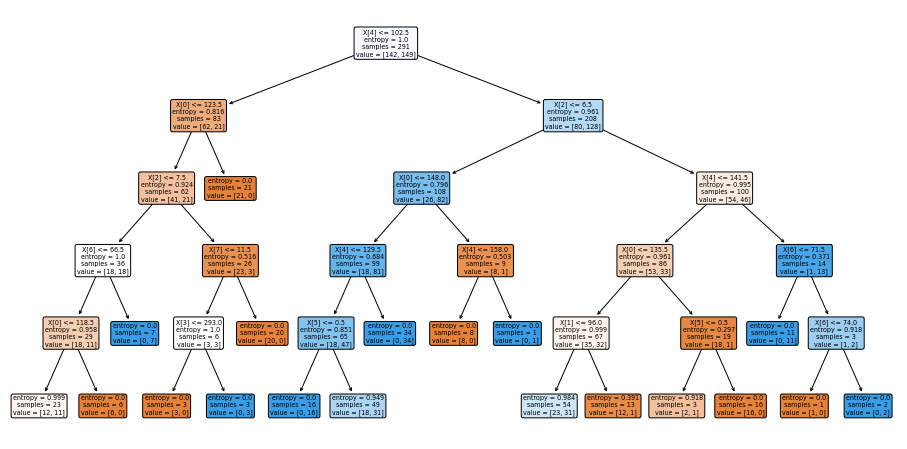

In [37]:
plt.figure(figsize = (16,8))
tree.plot_tree(model_2,rounded=True,filled=True)
plt.show()

In [38]:
#Model Evaluation
y_train_pred = model_2.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy score for trained data: ', round(accuracy, 4))

Accuracy score for trained data:  0.8144


In [39]:
confusion_matrix(y_train, y_train_pred)

array([[101,  41],
       [ 13, 136]], dtype=int64)

In [40]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       142
           1       0.77      0.91      0.83       149

    accuracy                           0.81       291
   macro avg       0.83      0.81      0.81       291
weighted avg       0.83      0.81      0.81       291



In [41]:
#Model Prediction using test data
y_test_pred = model_2.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy Score for tested data : ', round(accuracy_test, 4))

Accuracy Score for tested data :  0.6429


In [42]:
confusion_matrix(y_test, y_test_pred)

array([[24, 24],
       [11, 39]], dtype=int64)

In [43]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        48
           1       0.62      0.78      0.69        50

    accuracy                           0.64        98
   macro avg       0.65      0.64      0.63        98
weighted avg       0.65      0.64      0.64        98



In [44]:
#Building Decision Tree Classifier Model
#using hyper parameter
model = DecisionTreeClassifier(random_state=40)
criterion = ['entropy', 'gini']
max_depth = range(1,10)
param_grid = [{'criterion':criterion, 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 10)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=40),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(1, 10)}])

In [45]:
print('Best params : ', grid.best_params_)
print('Best score  : ', grid.best_score_)

Best params :  {'criterion': 'entropy', 'max_depth': 6}
Best score  :  0.7147126436781609


* After fine tuning, we have found that model is giving best score by using 'entropy' criterion with max_depth of tree as '6'.
* Building the final decision tree model with the above parameters.

In [46]:
model_final = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=40)
model_final.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=40)

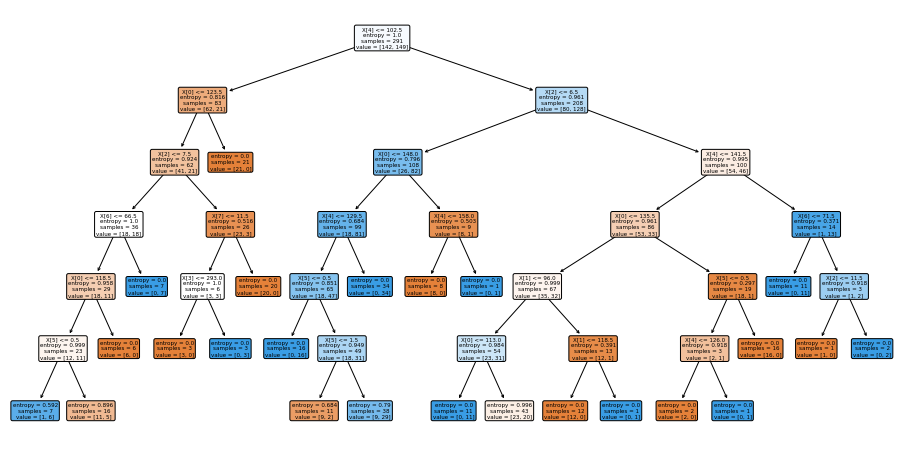

In [47]:
plt.figure(figsize=[16,8])
tree.plot_tree(model_final,rounded=True,filled=True)
plt.show()

In [48]:
#Model Evaluation
y_train_pred = model_final.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy score for trained data: ', round(accuracy, 4))

Accuracy score for trained data:  0.8729


In [49]:
confusion_matrix(y_train, y_train_pred)

array([[132,  10],
       [ 27, 122]], dtype=int64)

In [50]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       142
           1       0.92      0.82      0.87       149

    accuracy                           0.87       291
   macro avg       0.88      0.87      0.87       291
weighted avg       0.88      0.87      0.87       291



In [51]:
#Model Prediction using test data
y_test_pred = model_final.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy Score for tested data : ', round(accuracy_test, 4))

Accuracy Score for tested data :  0.7041


Conclusion
The accuracy of model on tested data is 0.70 which is good for the model.
The recall values for '0'(Low sales) & '1'(High sales) is also high, 
which says that the mdoel is not biased & predicting better & can be used for the futher prections.